## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
num_df=df.select_dtypes(include=['int','float','int64'])
num_df.shape

(244, 3)

In [7]:
cat_df=df.select_dtypes(include=['object'])
cat_df.shape

(244, 4)

### 2. Compute the average bill amount for each day.

In [8]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [9]:
df.groupby('sex')['tip'].sum().round(2)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [10]:
df.groupby('time')['size'].sum()# number of transaction

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [11]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383637
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [12]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

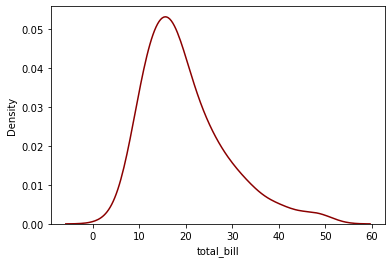

In [13]:
sns.distplot(df['total_bill'],
             hist=False, color='darkred',
            )


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

<AxesSubplot:>

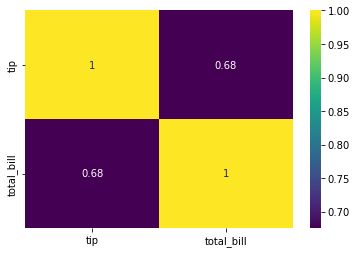

In [14]:
sns.heatmap(df[['tip','total_bill']].corr(),annot=True,cmap='viridis')

### 9. What is the percentage of males and females in the dataset? and display it in the plot

([<matplotlib.patches.Wedge at 0x2001f331c10>,
 [Text(-0.47909423581850497, 0.9901862012800839, ''),
  Text(0.4790942358185044, -0.9901862012800842, '')])

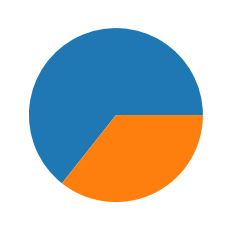

In [15]:
plt.pie(df['sex'].value_counts(normalize=True))

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

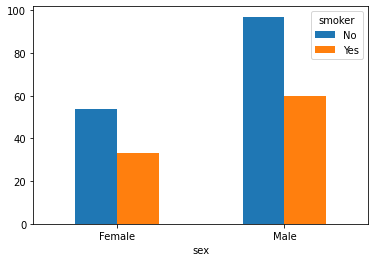

In [16]:
gender=df['sex']
smoker=df['smoker']
crosstb=pd.crosstab(gender,smoker)

barplot = crosstb.plot.bar(rot=0)


### 11. Compute the average tip amount given for different days and display it in the plot.

Text(0, 0.5, 'avg tip')

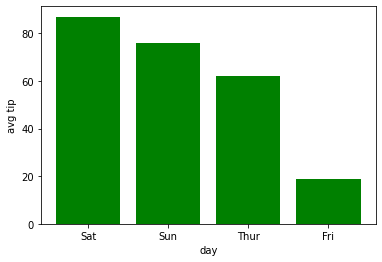

In [17]:
avg=df.day.value_counts()
plt.bar(avg.index, avg.values, color= 'green')
plt.xlabel('day')
plt.ylabel('avg tip')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

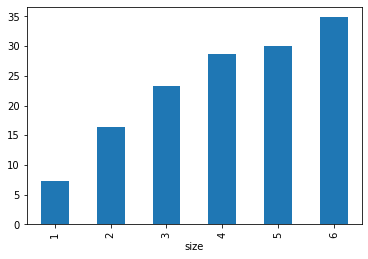

In [18]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

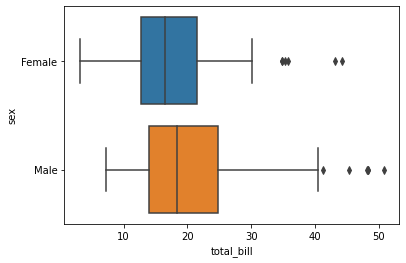

In [19]:
ax = sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [20]:
df_x=df.groupby(['time','day'],as_index=False)['total_bill'].max()
df_x[(df_x['day']=='Sat')|(df_x['day']=='Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


### 15. Compute the percentage of missing values in the dataset.

In [21]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [22]:
len(df[df.duplicated()])
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


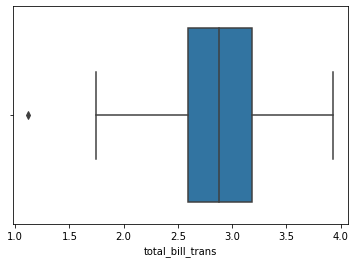

In [23]:

df['total_bill_trans']=np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


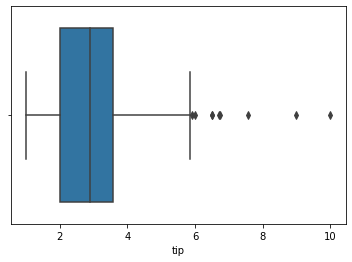

In [24]:
sns.boxplot(df['tip'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


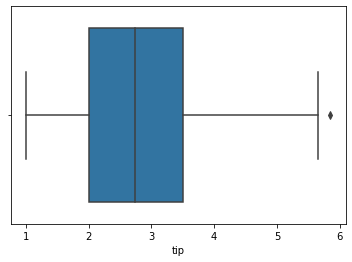

In [25]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_wisker = Q1-(1.5*IQR)
upper_wisker = Q3+(1.5*IQR)
df_out=df.loc[(df['tip']< upper_wisker)&(df['tip']>lower_wisker)]

sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [67]:
df=pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_mm
213,13.27,2.50,2,2.585506,0,1,1,0,0,0,0.213657
44,30.40,5.60,4,3.414443,1,0,0,1,0,0,0.572476
158,13.39,2.61,2,2.594508,0,0,0,1,0,0,0.216171
41,17.46,2.54,2,2.859913,1,0,0,1,0,0,0.301424
225,16.27,2.50,2,2.789323,0,1,0,0,0,1,0.276498


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [27]:
tb_max=df['total_bill'].max()
tb_min=df['total_bill'].min()
range_=tb_max-tb_min
print(range_)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['total_bill_mm']=mm.fit_transform(df[['total_bill']])
tb_mm_max=df['total_bill_mm'].max()
tb_mm_min=df['total_bill_mm'].min()
range_=tb_mm_max-tb_mm_min
print(range_)

47.74
0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [28]:
tips_df=df.copy()

#i) Encode the categorical variables.
tips_df=pd.get_dummies(df,drop_first=True)
tips_df.sample(5)



,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_mm
216,28.15,3.00,5,3.337547,1,1,1,0,0,0,0.525346
106,20.49,4.06,2,3.019937,1,1,1,0,0,0,0.364893
135,8.51,1.25,2,2.141242,0,0,0,0,1,1,0.113951
189,23.10,4.00,3,3.139833,1,1,0,1,0,0,0.419564
82,10.07,1.83,1,2.309561,0,0,0,0,1,1,0.146628


In [31]:
#ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
X=tips_df[['total_bill','size','total_bill_trans','sex_Male','smoker_Yes','day_Sat','day_Sun','time_Lunch','total_bill_mm']]
y=tips_df['tip']


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
from sklearn.preprocessing import MinMaxScaler

# create an  object
min_max = MinMaxScaler()

df_scaled1 = tips_df.copy()

df_scaled1.iloc[:,[0,2]] = min_max.fit_transform(df_scaled1.iloc[:,[0,2]])
df_scaled1.head()

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_mm
0,0.291579,1.01,0.2,2.832625,0,0,0,1,0,0,0.291579
1,0.152283,1.66,0.4,2.336020,1,0,0,1,0,0,0.152283
2,0.375786,3.50,0.4,3.044999,1,0,0,1,0,0,0.375786
3,0.431713,3.31,0.2,3.164631,1,0,0,1,0,0,0.431713
4,0.450775,3.61,0.6,3.202340,0,0,0,1,0,0,0.450775


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [71]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [72]:
regression_model.intercept_

-1.0979442136454534

In [76]:
coeff_df=pd.DataFrame(regression_model.coef_,X.columns,columns=['object'])
coeff_df

,object
total_bill,0.044122
size,0.145383
total_bill_trans,1.070207
sex_Male,-0.097017
smoker_Yes,-0.184763
day_Sat,-0.137599
day_Sun,-0.235526
time_Lunch,-0.092019
total_bill_mm,0.000924


In [80]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import r2_score
print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.3978356302476683
